# Limpeza de dados e estatística descritiva

Neste desafio, iremos revisar alguns conceitos vistos nas aulas e ver algumas novidades. Os dados originais são do [repositório de dados eleitorais do Tribunal Superior Eleitoral](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1). 

O CSV disponibilizado é formado pela conjunção de algumas tabelas do arquivo [orgao_partidario.zip](https://cdn.tse.jus.br/estatistica/sead/odsele/orgao_partidario/orgao_partidario.zip), localizado no menu Partidos > Órgão Partidário.

Preencha as lacunas abaixo para completar o desafio.

# Importe os pacotes necessários

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

# Leia o arquivo "receitas_orgaos_partidarios_2020_NORDESTE.csv" usando o Pandas

Na aula `1.10 - Outliers e valores faltantes`, vimos como utilizar o método `replace` para substituir valores em certos colunas do nosso dataframe e trocar o texto (string) `#NULO#` pela representação padrão do Pandas para valores nulos.

Aqui, vamos utilizar um outro método, onde definimos quais strings serão considerados valores nulos já na importação do arquivo.

Edite as células abaixo e inclua:

* O nome do arquivo que queremos importar
* O separador utilizado
* Insira uma lista no parâmetro `na_values` que contenha o texto a ser ignorado.

Experimente rodar os comandos primeiro sem e depois com o parâmetro `na_values`, então, compare a diferença. Observe, por exemplo, o campo `CD_CNAE_DOADOR`.

In [3]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';',encoding='latin-1')

df.info() # retorna nome das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 12874 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

In [4]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';',na_values='#NULO#')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 11606 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

# Filtre apenas os registros que sejam da prestação de contas final


In [5]:
# Primeiro vamos ver os valores únicos da coluna TP_PRESTACAO_CONTAS

df['TP_PRESTACAO_CONTAS'].unique()

array(['Final', 'Relatório Financeiro', 'Parcial',
       'Regularização da Omissão'], dtype=object)

In [6]:
# O resultado deste comando nos diz que quantas linhas e colunas temos antes do filtro
df.shape

(12874, 48)

In [7]:
# Preencha o campo os espaços abaixo com o nome da coluna e o valor desejado para nosso filtro
df_final = df[df['TP_PRESTACAO_CONTAS'] == 'Final'].copy()


In [8]:
# Rode o comando shape no novo dataframe criado e confira se o número de linhas foi reduzido

df_final.shape


(12288, 48)

In [9]:
df_final.head()


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,NaN,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,NaN,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,NaN,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000


## Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?

Vamos usar o método `value_counts` para não só listar cada valor único da coluna `CD_CNAE_DOADOR`, como também mostrar quantos registros temos em cada um.

In [10]:
df_final['DS_CNAE_DOADOR'].unique()

array([nan, 'Atividades de organizações políticas',
       'Atividades de associações de defesa de direitos sociais',
       'Desenvolvimento e licenciamento de programas de computador customizáveis',
       'Fabricação de embalagens de papel',
       'Administração pública em geral',
       'Atividades associativas não especificadas anteriormente',
       'Confecção de peças do vestuárioxceto roupas íntimas'],
      dtype=object)

In [11]:
# Preencha o nome da coluna abaixo
df_final['CD_CNAE_DOADOR'].value_counts()

-1        6509
 94928    5735
 94308      37
 14126       3
 62023       1
 17311       1
 84116       1
 94995       1
Name: CD_CNAE_DOADOR, dtype: int64

In [12]:
# Para ver os resultados em percentuais é fácil! Basta falarmos para o value_counts que queremos os resultados normalizados
df_final['CD_CNAE_DOADOR'].value_counts(normalize=True)

-1        0.529704
 94928    0.466715
 94308    0.003011
 14126    0.000244
 62023    0.000081
 17311    0.000081
 84116    0.000081
 94995    0.000081
Name: CD_CNAE_DOADOR, dtype: float64

Se o doador for pessoa jurídica, temos seu respectivo código CNAE. Se for pessoa física, então temos o valor `-1`. 

Qual conclusão podemos tirar a respeito dos comandos acima?

Escreva um **comentário** na célula abaixo com a resposta.

In [13]:
# Mais da metade dos registros são de pessoas físicas.

Agora, vamos duplicar a coluna `CD_CNAE_DOADOR` e deixar esta nova coluna apenas com 2 categorias: física (representada pelo valor -1) ou jurídica (que vamos representar inicialmente com 1).

In [14]:
# Vamos criar uma nova coluna que seja uma cópia exata da coluna CD_CNAE_DOADOR
df_final['TIPO_DOADOR'] = df_final['CD_CNAE_DOADOR'] # copia a coluna cd_cnae para tipo_doador

# O comando acima funciona, mas exibe um aviso de "chained assignments"
# Para não ter o aviso, poderíamos usar o loc
# df['TIPO_DOADOR'] = df.loc[:, 'CD_CNAE_DOADOR']
df_final['TIPO_DOADOR'] = df_final.loc[:,'CD_CNAE_DOADOR']
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,-1
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,-1
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2,94928
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000,94928
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000,94928


## Substituição condicional (conditional replacing)

Agora, vamos usar o método where do pacote NumPy (carinhosamente chamado de np abaixo).

Esta função recebe três parâmetros:

* Uma condição: no nosso caso, queremos que filtrar as coluna do CNAE onde os valores sejam -1
* Um valor: caso a condição acima seja verdadeira, qual valor deverá ser retornado?
* Outro valor: se a condição for falsa, então, qual outro valor deverá ser retornado?


In [15]:
# O comando abaixo também gera o aviso.

df_final['TIPO_DOADOR'] = np.where(df_final['CD_CNAE_DOADOR'] == -1, 'fisica', 'juridica')

df_final.head(20)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,fisica
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,fisica
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2,juridica
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000,juridica
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000,juridica
6,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000003A,850052,19413466,10/11/2020,NaN,10000,juridica
7,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P40000412564PI000002A,850005,19352757,09/10/2020,NaN,12000,juridica
8,22/07/2021,23:25:00,2020,2,Ordinária,Final,17/12/2020,1220395327,M,Municipal,...,-1,NaN,NaN,NaN,600888000022032,19488611,13/10/2020,NaN,1400,fisica
10,22/07/2021,23:25:00,2020,2,Ordinária,Final,03/05/2021,1220394974,F,Federal (Estadual/Distrital),...,14,PTB,Partido Trabalhista Brasileiro,P14000312190PI001057A,551003000140022,19859550,11/11/2020,NaN,210430,juridica
11,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220395472,M,Municipal,...,-1,NaN,NaN,P22000410065PI000001A,46266232391,18501643,23/10/2020,NaN,325,fisica


## Agrupando (group by)

In [24]:
# Preencha abaixo primeiro uma lista com as 3 colunas que precisamos utilizar para responder à pergunta. E depois o nome das 2 colunas que precisamos agrupar.

df_final[['TIPO_DOADOR', 'SG_UF', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).max()

VR_RECEITA
TIPO_DOADOR SG_UF            
fisica      AL          17665
            BA         200000
            CE         200000
            MA         100000
            PB          23000
            PE         150000
            PI          23708
            RN          25000
            SE          31000
juridica    AL        3900000
            BA       11900000
            CE        3900000
            MA        3900000
            PB        2169395
            PE        4998000
            PI        3900000
            RN        3900000
            SE        4000000

In [23]:
# Para repetir o valor da coluna TIPO_DOADOR nas linhas, coloque o parâmetro as_index=False no método groupby do comando acima

df_final[['TIPO_DOADOR', 'SG_UF', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF'],as_index=False).max()

,TIPO_DOADOR,SG_UF,VR_RECEITA
0,fisica,AL,17665
1,fisica,BA,200000
2,fisica,CE,200000
3,fisica,MA,100000
4,fisica,PB,23000
5,fisica,PE,150000
6,fisica,PI,23708
7,fisica,RN,25000
8,fisica,SE,31000
9,juridica,AL,3900000


## Qual o total de doações recebidas por partido?

In [30]:
df_final_total = df_final[['SG_PARTIDO', 'NM_PARTIDO', 'VR_RECEITA']].groupby(by=['NM_PARTIDO','SG_PARTIDO']).sum()
df_final_total

,,VR_RECEITA
NM_PARTIDO,SG_PARTIDO,
AVANTE,AVANTE,1555473
Cidadania,CIDADANIA,5433420
Democracia Cristã,DC,1415608
Democratas,DEM,2521140
Movimento Democrático Brasileiro,MDB,39185338
PROGRESSISTAS,PP,50241447
Partido Comunista Brasileiro,PCB,146072
Partido Comunista do Brasil,PC do B,2393497
Partido Democrático Trabalhista,PDT,13420365


## Qual é o top 10?

Crie um novo dataframe com os 10 partidos com mais doações. Você precisa primeiro ordenar os resultados e depois selecionar apenas os 10 primeiros.



In [32]:
df_final_soma_top_10 = df_final_total.sort_values(by='VR_RECEITA',ascending=False).head(10)
df_final_soma_top_10

,,VR_RECEITA
NM_PARTIDO,SG_PARTIDO,
Partido Social Democrático,PSD,55485632
PROGRESSISTAS,PP,50241447
Partido dos Trabalhadores,PT,43423701
Movimento Democrático Brasileiro,MDB,39185338
Partido Socialista Brasileiro,PSB,38124175
Partido Social Liberal,PSL,32500228
Podemos,PODE,15425546
Partido Trabalhista Brasileiro,PTB,13536876
Partido Democrático Trabalhista,PDT,13420365


# Vamos visualizar os resultados?
Na aula, nós vimos como usar o matplotlib para gerar gráficos. Agora, vamos descobrir uma nova forma de fazer o mesmo usando um método nativo Pandas. Experimente colocar `.plot(kind='barh')` após a consulta ou dataframe anterior.

Com este comando, podemos produzir um gráfico (plot) do tipo (kind) de barras horizontais (barh).

<AxesSubplot:ylabel='NM_PARTIDO,SG_PARTIDO'>

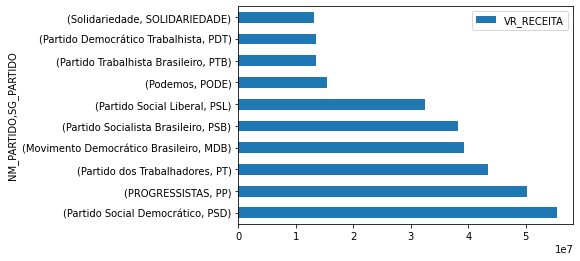

In [33]:
df_final_soma_top_10.plot(kind='barh')

## Qual o valor médio das doações por tipo de doador?

Agora é sua vez! A partir dos comandos anteriores, faça uma nova consulta para descobrir a mediana de acordo com o tipo de doador.

<AxesSubplot:ylabel='TIPO_DOADOR,SG_UF'>

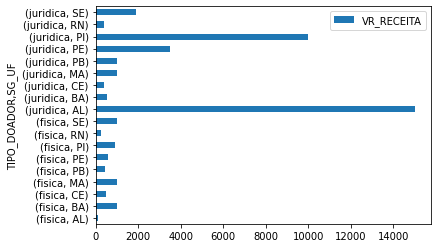

In [49]:
round(df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).median(),2).plot(kind='barh')

In [50]:
round(df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).mean(),2)

VR_RECEITA
TIPO_DOADOR SG_UF            
fisica      AL         653.87
            BA        1962.93
            CE        2127.78
            MA        2542.02
            PB         817.42
            PE        2687.90
            PI        1200.90
            RN        1244.89
            SE        1888.99
juridica    AL      121419.70
            BA       40453.71
            CE       66957.93
            MA       65374.25
            PB       71048.88
            PE       94264.60
            PI       78605.49
            RN       48464.93
            SE       53392.89

In [51]:
round(df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).max(),2)

VR_RECEITA
TIPO_DOADOR SG_UF            
fisica      AL          17665
            BA         200000
            CE         200000
            MA         100000
            PB          23000
            PE         150000
            PI          23708
            RN          25000
            SE          31000
juridica    AL        3900000
            BA       11900000
            CE        3900000
            MA        3900000
            PB        2169395
            PE        4998000
            PI        3900000
            RN        3900000
            SE        4000000

In [36]:
print(df_final['VR_RECEITA'].min())
df_final['VR_RECEITA'].max()

0


11900000

In [42]:
round(df_final['VR_RECEITA'].describe(),2)

count       12288.00
mean        30939.86
std        213886.00
min             0.00
25%           100.00
50%           800.00
75%          4000.00
max      11900000.00
Name: VR_RECEITA, dtype: float64

In [44]:
round(df_final['VR_RECEITA'].max(),2)

AttributeError: 'int' object has no attribute 'plot'

# Entreviste você mesmo

Escreva abaixo pelo menos outras três perguntas que podem ser feitas à base de dados. Escreva a pergunta como um comentário acima do código com a consulta em Python.